**Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

**Question:-1**

**Loading Dataset**

In [2]:
digits = load_digits()

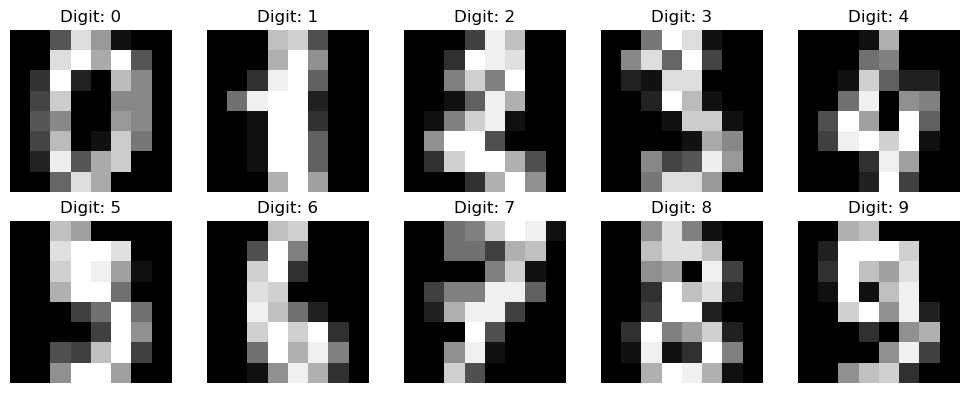

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
X = digits.data
y = digits.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [7]:
y_pred = svm_model.predict(X_test)

In [8]:
print("Classification Report:")
classification_report(y_test, y_pred)

Classification Report:


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        33\n           1       1.00      1.00      1.00        28\n           2       1.00      1.00      1.00        33\n           3       1.00      1.00      1.00        34\n           4       1.00      1.00      1.00        46\n           5       0.98      0.98      0.98        47\n           6       0.97      1.00      0.99        35\n           7       0.97      0.97      0.97        34\n           8       1.00      0.97      0.98        30\n           9       0.95      0.95      0.95        40\n\n    accuracy                           0.99       360\n   macro avg       0.99      0.99      0.99       360\nweighted avg       0.99      0.99      0.99       360\n'

In [9]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 38]], dtype=int64)

In [10]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")


Kernel: linear
Accuracy: 0.9777777777777777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  

In [11]:
degrees = [2, 3, 4]
for degree in degrees:
    svm_model = SVC(kernel='poly', degree=degree)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    print(f"Degree: {degree}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")


Degree: 2
Accuracy: 0.9888888888888889
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      1.00      0.99        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.97      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0 

In [12]:
gammas = ['scale', 'auto', 0.1, 0.01]
for gamma in gammas:
    svm_model = SVC(kernel='rbf', gamma=gamma)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    print(f"Gamma: {gamma}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")


Gamma: scale
Accuracy: 0.9861111111111112
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
random_states = [0, 42, 100]
for random_state in random_states:
    svm_model = SVC(kernel='rbf', random_state=random_state)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    print(f"Random State: {random_state}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")


Random State: 0
Accuracy: 0.9861111111111112
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0 

In [14]:
Cs = [0.1, 1, 10]
for C in Cs:
    svm_model = SVC(kernel='rbf', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = svm_model.score(X_test, y_test)
    print(f"C: {C}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")


C: 0.1
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.87      0.96      0.92        28
           2       0.97      0.97      0.97        33
           3       1.00      0.91      0.95        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.94      0.97      0.96        34
           8       0.87      0.87      0.87        30
           9       0.92      0.90      0.91        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  1  0 31  0  0  0  0  2  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0

**Question:-2**

In [15]:
#Reading the dataset
df = pd.read_excel('Carseats.xlsx')

In [16]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [17]:
df.shape #Checking for the shape of dataset

(400, 11)

In [18]:
df.describe() #Describing the Data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [19]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [20]:
mean_value = df['Sales'].mean() #Checking for the mean value

In [21]:
mean_value

7.496325000000001

In [22]:
Y = df['Sales'] > 8  # Creating a binary labels True for sales > 8, False otherwise

In [23]:
label_encoder = LabelEncoder() # Encoding categorical variables
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])

<IPython.core.display.Javascript object>

In [24]:
X = df.drop(columns=['Sales']) #Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
clf = DecisionTreeClassifier(random_state=42) #Train the Decision Tree classifier
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
Y_pred_train = clf.predict(X_train) # Making predictions
Y_pred_test = clf.predict(X_test)

In [27]:
train_accuracy = accuracy_score(Y_train, Y_pred_train) #Evaluate the model
test_accuracy = accuracy_score(Y_test, Y_pred_test)

In [28]:
print("Training Accuracy:")
train_accuracy

Training Accuracy:


1.0

In [29]:
print("Test Accuracy:")
test_accuracy

Test Accuracy:


0.7